# XLooper Example

> Usage demo of `qom.loopers.XLooper` module.

## Imports

In [1]:
# qom modules
from qom.loopers import XLooper

## Simplified Usage

### Obtaining Results

The `XLooper` class inherits the `BaseLooper` class to perform a one-dimensional looping of a function based on supplied parameters. The results are obtained as a dictionary with keys `X` and `V` for the axis and calculated values respectively.

In [2]:
# format of the calculation function for each iteration
# all four parameters should be declared even if unused
# results should be updated with input and output values
def func(system_params, val, logger, results):
    # demo implementation
    # perform a square
    res = float(val**2)
    # update results
    results.append((val, res))

# parameters
params = {
    'looper': {
        # pass the variable as list
        'X': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
    }
}

# initilize the looper with the function and the parameters
looper = XLooper(func, params)
# get resultant dictionary
results = looper.loop()
# display results
print(results)

{'X': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 'V': [0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0]}


### Plotting Results

Loopers support effortless plotting by just passing the `plot` argument as `True`.

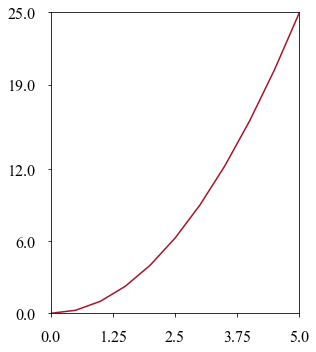

In [3]:
# plotting option
results = looper.loop(plot=True)

### Calculating Gradients

Gradients from the values can be obtained by passing the `grad` argument as `True`.

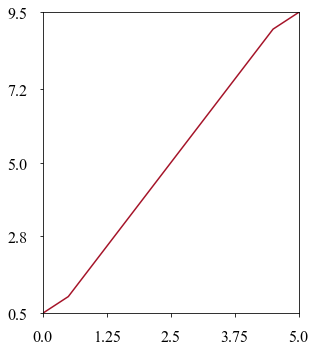

In [4]:
# gradient option
results = looper.loop(grad=True, plot=True)

## System-based Usage

### System Structure

A class defining the system with a method to return squared values is demonstrated.
The system class is initialized by the system parameters `params`.

In [5]:
class System00:
    """Demo class for the system.

    Parameters
    ----------
    params : dict
        Parameters for the system.
    """

    def __init__(self, params):
        """Class constructor for System00."""

        # set attributes
        self.code = 'sys_00'
        self.name = 'System 00'
        # set parameters
        self.params = {
            'x': params.get('x', 0.0)
        }

    def get_square(self):
        """Demo method to obtain squared value.
            
        Returns
        -------
        y : float
            Square of the parameter.
        """

        return self.params['x']**2

### Declaring Parameters

Parameters for the looper, plotter, system are passed as a dictionary. Systems may also use the modules in `qom.solvers` for advanced calculations.

In [6]:
params = {
    'looper': {
        'plot': True,
        'X': {
            'var': 'x',
            'min': -5,
            'max': 5,
            'dim': 101
        }
    },
    'plotter': {
        'type': 'line',
        'title': 'Square Function',
        'x_name': '$x$',
        'v_label': '$x^{2}$'
    },
    'system': {
        'x': 2.0
    }
}

### Looping

The function updates the system parameters to calculate the required method with the updated parameters.

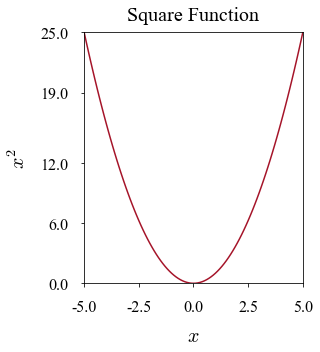

In [7]:
# initialize system
system = System00(params['system'])

# function to loop
def func(system_params, val, logger, results):
    """Demo function for the looper.

    Parameters
    ----------
    system_params : dict
        Parameters of the system for each iteration.
    val : float or complex
        Particular value of the iteration.
    logger : :class:`logging.Logger`
        Module logger.
    results : list
        List of results with tuples of value and calculated output.
    """

    # update system parameters
    system.params = system_params
    # get result
    res = system.get_square()
    # update results
    results.append((val, res))

# looper
looper = XLooper(func, params)
results = looper.loop()

### Obtaining Thresholds

Loopers contain a threshold calculation function which calculates the positions of maxima or minima depending on the mode of finding the index `thres_mode`.

In [8]:
# get threshold of minimum value at which the plot reaches maximum
thres = looper.get_thresholds(thres_mode='minmax')
# display threshold
print(thres)

{'X': -5.0, 'V': 25.0}
